# EXPLORATORY DATA ANALYSIS 

In [1]:
# installing api
!pip install nba_api

## CHECKING TEAM RECORDS DF 

In [2]:
# importing data teams and match results from api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [3]:
# storing teams data in the teams variable
teams = teams.get_teams()

In [4]:
# converting response of API (teams) into df
import pandas as pd
data = pd.DataFrame(teams)

In [5]:
data.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


## CHECKING GAME RECORDS DF

In [7]:
# importing game records
from nba_api.stats.endpoints import leaguegamefinder

In [8]:
# Create an instance of LeagueGameFinder
game_finder = leaguegamefinder.LeagueGameFinder(
    league_id_nullable="00",
)

# Retrieve game data
game_data = game_finder.get_data_frames()[0]

In [9]:
# showing game_data with all columns viseble on data frame
pd.set_option("display.max_columns", None)
game_data.head(2)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42022,1610612743,DEN,Denver Nuggets,0042200405,2023-06-12,DEN vs. MIA,W,240,94,38,84,0.452,5,28,0.179,13,23,0.565,11,46,57,21,6,7,14,13,5.0
1,42022,1610612748,MIA,Miami Heat,0042200405,2023-06-12,MIA @ DEN,L,240,89,33,96,0.344,9,35,0.257,14,16,0.875,11,33,44,18,9,7,8,21,-5.0


In [10]:
game_data

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42022,1610612743,DEN,Denver Nuggets,0042200405,2023-06-12,DEN vs. MIA,W,240,94,38,84,0.452,5,28,0.179,13,23,0.565,11,46,57,21,6,7,14,13,5.0
1,42022,1610612748,MIA,Miami Heat,0042200405,2023-06-12,MIA @ DEN,L,240,89,33,96,0.344,9,35,0.257,14,16,0.875,11,33,44,18,9,7,8,21,-5.0
2,42022,1610612743,DEN,Denver Nuggets,0042200404,2023-06-09,DEN @ MIA,W,242,108,39,79,0.494,14,28,0.500,16,21,0.762,5,29,34,26,11,7,6,18,13.0
3,42022,1610612748,MIA,Miami Heat,0042200404,2023-06-09,MIA vs. DEN,L,240,95,35,78,0.449,8,25,0.320,17,20,0.850,8,29,37,23,2,3,14,19,-13.0
4,42022,1610612748,MIA,Miami Heat,0042200403,2023-06-07,MIA vs. DEN,L,240,94,34,92,0.370,11,35,0.314,15,19,0.789,10,23,33,20,7,3,4,22,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22012,1610612762,UTA,Utah Jazz,0021200087,2012-11-10,UTA vs. PHX,W,240,94,38,78,0.487,2,14,0.143,16,24,0.667,10,42,52,22,3,7,18,18,13.0
29996,22012,1610612756,PHX,Phoenix Suns,0021200087,2012-11-10,PHX @ UTA,L,242,81,32,87,0.368,4,16,0.250,13,17,0.765,10,27,37,15,12,4,10,25,-13.0
29997,22012,1610612744,GSW,Golden State Warriors,0021200089,2012-11-10,GSW vs. DEN,L,290,101,39,102,0.382,9,25,0.360,14,23,0.609,13,41,54,23,11,5,14,26,-6.0
29998,22012,1610612764,WAS,Washington Wizards,0021200082,2012-11-10,WAS @ IND,L,240,85,35,79,0.443,10,24,0.417,5,7,0.714,5,35,40,26,5,5,12,21,-4.0


## PROMTING USER TO INPUT TEAM NAMES AND SEASON TYPE FOR COMPARISON

In [12]:
import numpy as np

while True:
    team1 = input("Enter the 1st nba team name to compare\t: ").lower().strip()
    if (team1 in np.char.lower(data['full_name'].values.astype(str))):
        break
    else:
        print('Please enter a valid team name!')
###################################################################################       
while True:
    team2 = input("Enter the 2nd nba team name to compare\t: ").lower().strip()
    if (team2 in np.char.lower(data['full_name'].values.astype(str))):
        break
    else:
        print('Please enter a valid team name!')
###################################################################################
while True:         
    season_type = input('Enter "r" for <Regular Season> or "p" for<Playoffs>\t: ').lower().strip()
    if season_type == 'r':
               season_type = 'Regular Season'
               break
    elif season_type == 'p':
               season_type = 'Playoffs'
               break
    else:
               print('Please enter a valid value!')        

Enter the 1st nba team name to compare	: bsd
Please enter a valid team name!
Enter the 1st nba team name to compare	: boston celtics
Enter the 2nd nba team name to compare	: miami hits
Please enter a valid team name!
Enter the 2nd nba team name to compare	: miami heats
Please enter a valid team name!
Enter the 2nd nba team name to compare	:  miami heats
Please enter a valid team name!
Enter the 2nd nba team name to compare	:  miami heat 
Enter "r" for <Regular Season> or "p" for<Playoffs>	: r


In [13]:
# capturing data based on inputs
game_finder = leaguegamefinder.LeagueGameFinder(
    league_id_nullable="00",       # NBA
    season_type_nullable=season_type,  # or "Playoffs" as needed
)

# Retrieve game data
game_data = game_finder.get_data_frames()[0]

### CHECKING MATCHES BETWEEN CHOOSEN TEAMS BETWEEN (2010-12-23 : 2023-04-09)

In [14]:
# capturing abbrivation of teams names
team1_abb = data[data['full_name'].str.lower() == team1]['abbreviation'].iloc[0]
team2_abb = data[data['full_name'].str.lower() == team2]['abbreviation'].iloc[0]

In [32]:
# creating variables for both inputed home games and away games
home_games = team1_abb + ' vs. ' + team2_abb
away_games = team1_abb + ' @ ' + team2_abb

In [63]:
# Retrieve home games
records_home = game_data[game_data['MATCHUP'] == home_games]
records_home.head()

(22, 28)

In [42]:
# Retrieve away games
records_away = game_data[game_data['MATCHUP'] == away_games]
records_away.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1031,22022,1610612738,BOS,Boston Celtics,0022200714,2023-01-24,BOS @ MIA,L,240,95,32,74,0.432,10,32,0.313,21,27,0.778,5,39,44,21,5,6,17,22,-3.0
2417,22022,1610612738,BOS,Boston Celtics,0022200022,2022-10-21,BOS @ MIA,W,241,111,41,79,0.519,14,33,0.424,15,15,1.000,12,31,43,17,4,11,19,23,7.0
4676,22021,1610612738,BOS,Boston Celtics,0022100121,2021-11-04,BOS @ MIA,W,239,95,31,78,0.397,16,41,0.390,17,20,0.850,11,35,46,16,7,4,16,16,17.0
6865,22020,1610612738,BOS,Boston Celtics,0022000111,2021-01-06,BOS @ MIA,W,241,107,42,99,0.424,12,35,0.343,11,12,0.917,16,37,53,22,7,5,7,23,2.0
7194,22019,1610612738,BOS,Boston Celtics,0021901260,2020-08-04,BOS @ MIA,L,239,106,37,85,0.435,10,33,0.303,22,27,0.815,14,31,45,15,7,4,16,26,-6.0


# DATA VISUALIZATION

In [55]:
import matplotlib.pyplot as plt

In [83]:
# Overall games between selected teams
overall_result = pd.concat([records_home, records_away])
overall_result.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1794,22022,1610612738,BOS,Boston Celtics,0022200328,2022-12-02,BOS vs. MIA,L,265,116,40,87,0.460,15,45,0.333,21,28,0.750,7,41,48,26,6,2,20,18,-4.0
1819,22022,1610612738,BOS,Boston Celtics,0022200314,2022-11-30,BOS vs. MIA,W,239,134,46,83,0.554,22,45,0.489,20,23,0.870,11,30,41,32,7,0,17,18,13.0
2651,22021,1610612738,BOS,Boston Celtics,0022101139,2022-03-30,BOS vs. MIA,L,241,98,35,85,0.412,11,37,0.297,17,23,0.739,8,36,44,27,9,1,17,22,-8.0
3412,22021,1610612738,BOS,Boston Celtics,0022100762,2022-01-31,BOS vs. MIA,W,241,122,44,84,0.524,16,42,0.381,18,27,0.667,9,35,44,24,9,6,10,15,30.0
5022,22020,1610612738,BOS,Boston Celtics,0022001032,2021-05-11,BOS vs. MIA,L,238,121,46,88,0.523,18,37,0.486,11,17,0.647,3,29,32,31,8,5,11,21,-8.0


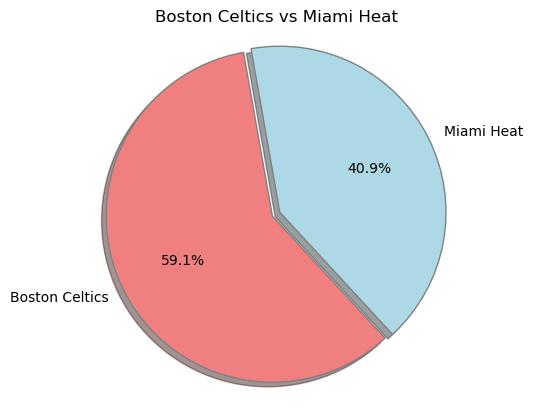

In [107]:
# Overall win-lose comparasion - pie chart

# number of wins per selected team
wins_team1 = overall_result[overall_result['WL'] == 'W'].shape[0]
wins_team2 = overall_result[overall_result['WL'] == 'L'].shape[0]
# names of teams
labels = [team1.title(), team2.title()]
# sizes of teams in pie chart
sizes = [wins_team1, wins_team2]
colors = ['lightcoral', 'lightblue']
# second team result will be seperated
explode = (0, 0.05)
# creating pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100, explode=explode,
       shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'gray'})
# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
# Adding title
plt.title(team1.title() + ' vs ' + team2.title())
plt.show;

# BURDAN ITABAREN DEVAM ET

In [57]:
# Home games win-lose comparasion
import seaborn as sns
categories = [team1, team2]
sns.set_theme(style="whitegrid")
# drawing a nested barplot
g = sns.carplot(data=home_games, kind=bar,)
sns.barplot(x)

In [ ]:

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [59]:
# Max Score Difference in Home Games : Home Team Won

In [ ]:
# Max Score Difference in Home Games : Home Team Lost

In [58]:
# Away games win-lose comprasion

In [ ]:
# Max Score Difference in Away Games : Away Team Won

In [ ]:
# Max Score Difference in Away Games : Home Team Lost